In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng

In [102]:
X2 = np.linspace(0,10,int(10/0.01))
X1 = []
for i in X2:
    X1.append(5 -np.sin(i))
X1 = np.array(X1)

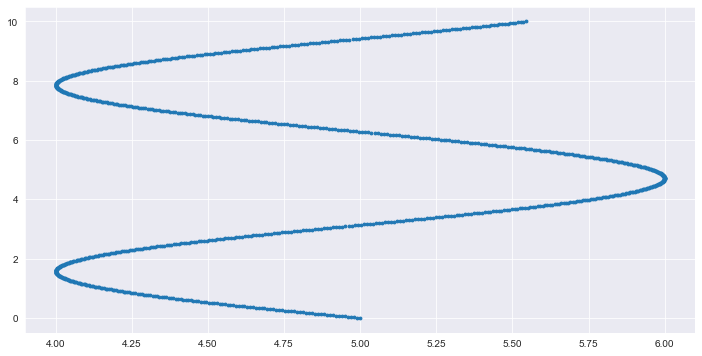

In [103]:
fig,(ax1) = plt.subplots(1, figsize = (12,6))
ax1.scatter (X1, X2, s = 8)

In [104]:
x1, x2 = grid = np.meshgrid(np.linspace(0,10,51), np.linspace(0,10,51))
x1 = x1.ravel().reshape(-1,1)
x2 = x2.ravel().reshape(-1,1)
y = []

In [105]:
for i in range(x1.size):
    x1_predicted = 5 - np.sin(x2[i])
    #print(x1_predicted)
    #print(x1[i])
    result = x1_predicted - x1[i]
    weight = float(0.8 + (x1[i] + x2[i]) * 0.01)
    if result > 0:
        y.append(np.random.choice([1, 2], 1, p=[weight, 1-weight]))
        #print(y)
    else:
        y.append(np.random.choice([1, 2], 1, p=[1-weight, weight]))
y = np.array(y).reshape(-1,)

In [123]:
X = np.hstack((x1.ravel().reshape(-1,1), x2.ravel().reshape(-1,1)))
X

array([[ 0. ,  0. ],
       [ 0.2,  0. ],
       [ 0.4,  0. ],
       ...,
       [ 9.6, 10. ],
       [ 9.8, 10. ],
       [10. , 10. ]])

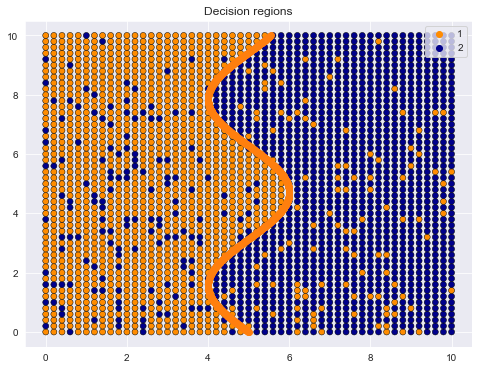

In [122]:
from matplotlib.colors import ListedColormap
import seaborn as sns

cmap_bold = ListedColormap(['darkorange', 'darkblue'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.scatter(X1, X2)
plt.title("Decision regions")

plt.show()

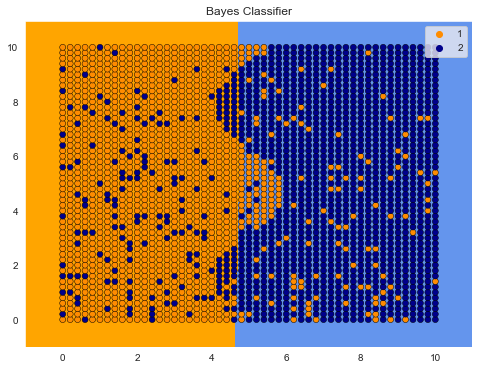

In [119]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y)

h = .02
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Bayes Classifier")

plt.show()

In [111]:
predict = 0.8 + 0.01 * (x1 + x2)
print('Bayes error rate: ', 1-np.mean(predict))

Bayes error rate:  0.09999999999999976


<ipython-input-109-2d5ee991f4c5>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


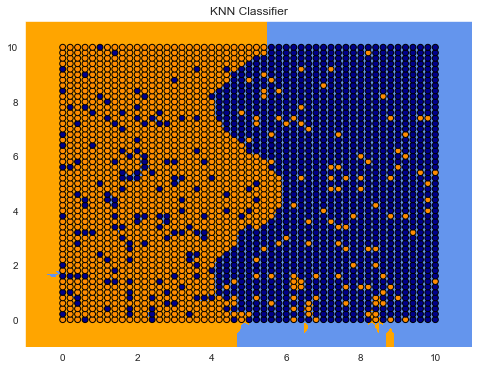

In [109]:
from sklearn.neighbors import KNeighborsClassifier
h = .02
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha=1.0, edgecolor="black")
plt.title("KNN Classifier")

plt.show()

In [112]:
from sklearn.model_selection import KFold
count = 1
result = []
# Prediction error using the 5-fold cross validation approach
print('Validation Set Estimated/ Test Error Rate for this Validation Set')
cv_10fold = KFold(n_splits=5, random_state=5, shuffle=True)
for train, test in cv_10fold.split(X):
    x_train_10fold, x_test_10fold = X[train], X[test]
    y_train_10fold, y_test_10fold = y[train], y[test]
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X[train],y[train])
    #pred = neigh.score(X[test],y[test])
    pred = neigh.predict(X[test])
    result.append(np.mean(pred != y[test]))
    #print(pred)
    print(str(count) + ': \t\t\t\t\t'+ str(np.mean(pred != y[test])))
    count+=1
print('Estimated KNN(5) Error Rate: '+ str(np.mean(result)))

Validation Set Estimated/ Test Error Rate for this Validation Set
1: 					0.11132437619961612
2: 					0.12884615384615383
3: 					0.12115384615384615
4: 					0.12692307692307692
5: 					0.11346153846153846
Estimated KNN(5) Error Rate: 0.1203417983168463
